In [1]:
import numpy as np
in_dir = 'data/'
txt_name = 'irisdata.txt'
iris_data = np.loadtxt(in_dir + txt_name, comments="%")
# x is a matrix with 50 rows and 4 columns
x = iris_data[0:50, 0:4]

In [2]:
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")
print(x.shape)

Number of features: 4 and number of observations: 50
(50, 4)


In [3]:
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]

In [4]:
# Use ddof = 1 to make an unbiased estimate
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_w = pet_w.var(ddof=1)

In [5]:
#A[i] is the sep_l of observation i, and B[i] is the sep_w of observation i
def covariance(A, B):
    N = len(A)
    return (1/(N-1))*np.dot(A, B)

In [6]:
covariance(sep_l, pet_l), covariance(sep_l, sep_w)

(7.484489795918366, 17.61)

Higher covariance between sep_l and sep_w, compared to the covariance between sep_l and pet_l.
Therefore, there seems to be stronger connection between sep_l and sep_w, than between sep_l and pet_l.

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

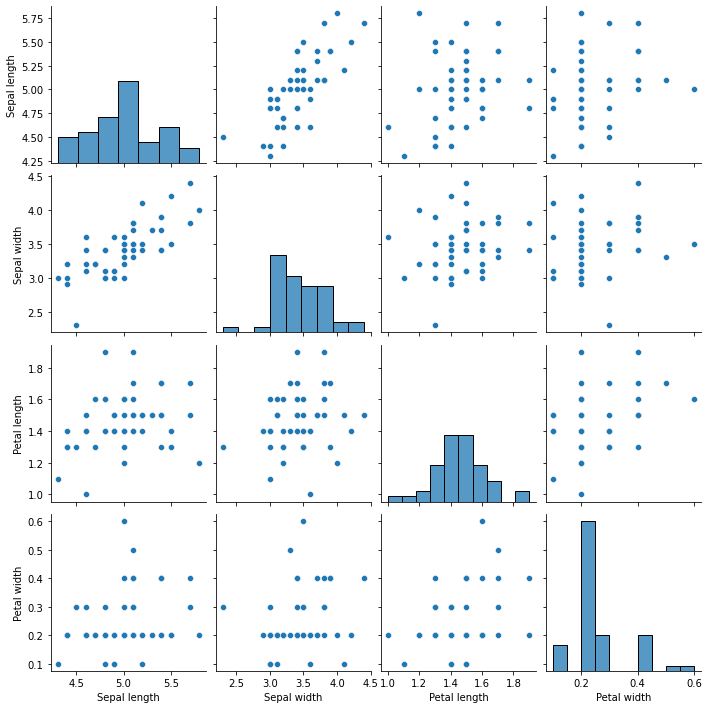

In [8]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=['Sepal length', 'Sepal width',
'Petal length', 'Petal width'])
sns.pairplot(d)
plt.show()

## PCA

In [10]:
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(x)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_
data_transform = pca.transform(x)

In [11]:
values_pca

array([0.23645569, 0.03691873, 0.0267964 , 0.00903326])

In [12]:
exp_var_ratio

array([0.7647237 , 0.11939924, 0.0866625 , 0.02921456])

In [13]:
vectors_pca

array([[ 0.6690784 ,  0.73414783,  0.0965439 ,  0.06356359],
       [-0.59788401,  0.62067342, -0.49005559, -0.13093791],
       [-0.43996277,  0.27460747,  0.8324495 ,  0.19506751],
       [-0.03607712, -0.01955027, -0.23990129,  0.96992969]])

<Figure size 432x288 with 0 Axes>

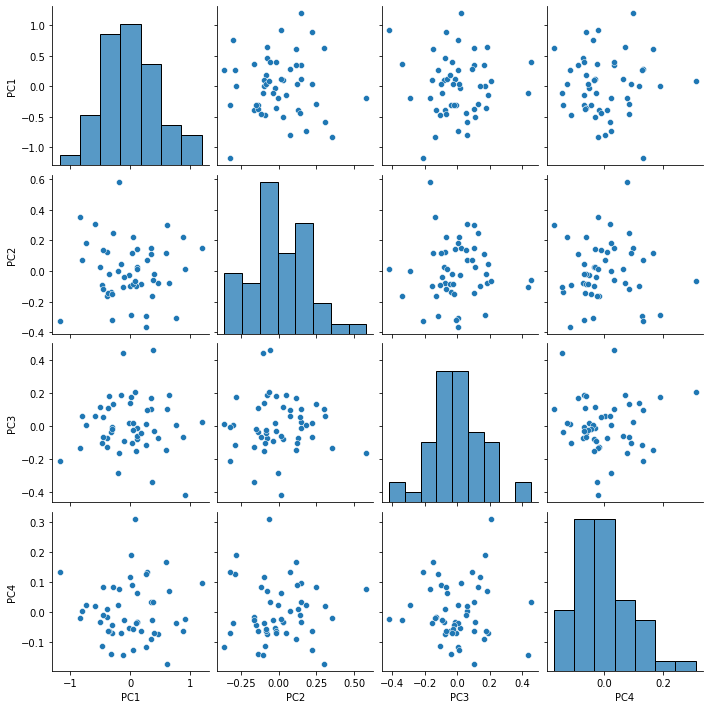

In [16]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(data_transform, columns=['PC1', 'PC2',
'PC3', 'PC4'])
sns.pairplot(d)
plt.show()

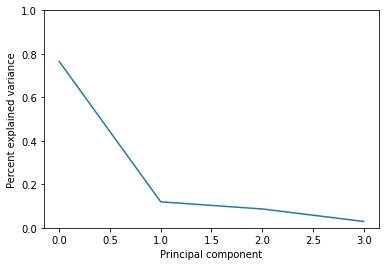

In [18]:
plt.plot(exp_var_ratio)
plt.xlabel('Principal component')
plt.ylabel('Percent explained variance')
plt.ylim([0, 1])
plt.show()